# Теория

Метод Ньютона(касательных)
---

Метод Ньютона, алгоритм Ньютона (также известный как метод касательных) — это итерационный численный метод нахождения корня (нуля) заданной функции.

Основная идея метода заключается в следующем: задаётся начальное приближение вблизи предположительного корня, после чего строится касательная к графику исследуемой функции в точке приближения, для которой находится пересечение с осью абсцисс. Эта точка берётся в качестве следующего приближения. И так далее, пока не будет достигнута необходимая точность.

### Расчетная формула метода Ньютона(касательных):
$$x^{(n+1)}=x^{(n)}-\cfrac{f(x^{(n)})}{f^\prime(x^{(n)})}, n \geqslant 0.$$

__Достоинства:__ квадратичная сходимость. 

__Недостатки:__ необходимость вычисления производной на каждой итерации и требования к выбору начального положения.


Метод секущих
---

Упрощение метода Ньютона, в котором $f'(x)$ заменяется разностным приближением:
$$f'(x_n) \approx \frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}}$$

### Рабочая формула: 

$$x_{i+1} = x_i - \frac{x_i - x_{i-1}}{f(x_i) - f(x_{i-1})}f(x_i),\ i = 1,2...$$

__Достоинства:__ меньший объем вычислений по сравнению с предыдущим методом. 

__Недостатки:__ порядок сходимости меньше, чем у метода касательных.

## Критерий окончания

При заданной точности $\varepsilon > 0$ вычисления нужно вести до тех пор, пока не окажется выполненным неравенство
 $|x_n - x_{n - 1}| \leq \varepsilon$ или $|f(x_n)| \leq \varepsilon$.


$$ \lim_{x \to -\infty}Si(x) = \frac{\pi}{2}\approx-1.5708 $$

$$\lim_{x \to +\infty}Si(x) = \frac{\pi}{2}\approx1.5708$$

Функция: $$f(x) = Si(x)=\int_0^x \frac{sin(t)}{t}dx$$

Производная функции: $$\frac{dy}{dx} Si(x) = sinc(x)$$

# Постановка задачи

Цель задания – построить обратную функцию для $Si(x)$ методом Ньютона (метод касательных) и методом секущих.

Построить таблицу обратной $Si(x)$ функции $F=Si^{-1}(x)$:

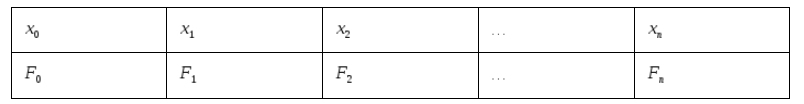

$F_i = Si^{-1}(x_i), x_i = a+ih, i=0,\dots,n$

Для этого рашим уравнение:
$F(z)=0$

$F(z_i) = Si(z_i) - F_i = 0$ , где

$F_i = Si(x_0) + i*\frac{Si(x_n) - Si(x_0)}n$

Найти $z_i$ такие, что $Si(z_i) = F_i$ для $i=0,\dots,n$ при $n=10$

In [1]:
import numpy as np
import pandas as pd

from pylab import figure, cm
import matplotlib.pyplot as plt

from typing import Callable

In [2]:
def Si(x, n=1000, t = 0, eps=1e-10):
    """
    Интегрального синуса основанный на ряде Тейлора
    
    Ключевые параметры:
    x: type float: до какой точки интегрируем 
    n: type float: количество разбиений
    t: type int: счетчик, начинаем разбиение с 0
    eps: type float: точность

    
    Возращает:
    result: type float: Q - десятичное приближение 
    """

    Q = np.float32(0)
    for t in np.arange(0, n):
        temp = (-1)**t * x**(2*t+1) / (np.math.factorial(2*t+1)*(2*t+1))
        Q += temp
        
        if (np.abs(temp) <= eps): break
             
    return Q

In [3]:
def Sinc(x):
    if np.isinf(x):
        return 1/x
    if not x:
        return x+1
    return np.sin(x)/x

# Построение таблицы  и графика обратной к $V(x)$ функции $F(x) = V^{-1}(x)$


Решение уравнения $V(z) = F_i, F_i = V(x_0)+i* \frac{V(x_n)-V(x_0)}{n}, i = 0,\dots,n,$ 

здесь $x_i = a + i*h, h = \frac{b-a}{n}$




Так как исходная функция монотонна только на отрезках от $-\frac{\pi}2$ до $0$ и от $0$ до $\frac{\pi}2$ то будем работать в этих диапазонах.

In [4]:
a = -np.pi/2
b = np.pi/2
n = 10
h = (b - a) / n 
x = [a + i*h for i in np.arange(n)]

In [5]:
def Fi(x0, xn, n):
    F = [Si(x0) + i * (Si(xn) - Si(x0)) / n for i in np.arange(n)]
        
    return F


In [6]:
F = Fi(x[0], x[n - 1], n)

## Метода Ньютона

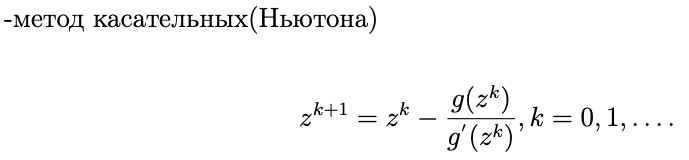

In [7]:
def newton(f: Callable[[float], float], dfdx: Callable[[float], float], x0: float, F:float,
    eps: float=1e-10, kmax: int=1e3) -> [float, int]:
    """
    Решает f(x) = 0 методом Ньютона с точностью eps
    :параметр f: функция f
    :параметр dfdx: дифференциал f'
    :параметр x0: начальная точка
    :параметр: F: значения Fi
    :параметр eps: искомая точность
    :араметр kmax: число итераций 
    :возвращает: корень из f(x) = 0 и кол-во итераций
    """
    
    x, xk, i = x0 - (f(x0) - F) / dfdx(x0), x0, 0
    
    
    while np.abs(x - xk) >= eps and i < kmax:
        x, xk, i = x - (f(x) - F) / dfdx(x), x, i + 1

    return np.round(x, 5), i

### Таблица 

In [8]:
res_newton = [newton(Si, Sinc, x[i], F[i]) for i in np.arange(n)]
res_newton_vec, k_newton = zip(*res_newton)
si_vec = [Si(i) for i in x]

In [10]:
data_newton = {r'$x_i$': x,
        r'$Si(x_i)$': si_vec,
        r'$Si^{-1}(x_i)$': res_newton_vec,
        r'k итераций': k_newton}

df_newton = pd.DataFrame(data_newton)
df_newton

,$x_i$,$Si(x_i)$,$Si^{-1}(x_i)$,k итераций
0,-1.570796,-1.370762,-1.57080,0
1,-1.256637,-1.151477,-1.21355,3
2,-0.942478,-0.897189,-0.90672,3
3,-0.628319,-0.614700,-0.62767,2
4,-0.314159,-0.312442,-0.36455,3
5,0.000000,0.000000,-0.10972,2
6,0.314159,0.312442,0.14274,3
7,0.628319,0.614700,0.39830,3
8,0.942478,0.897189,0.66301,3
9,1.256637,1.151477,0.94488,4


### График

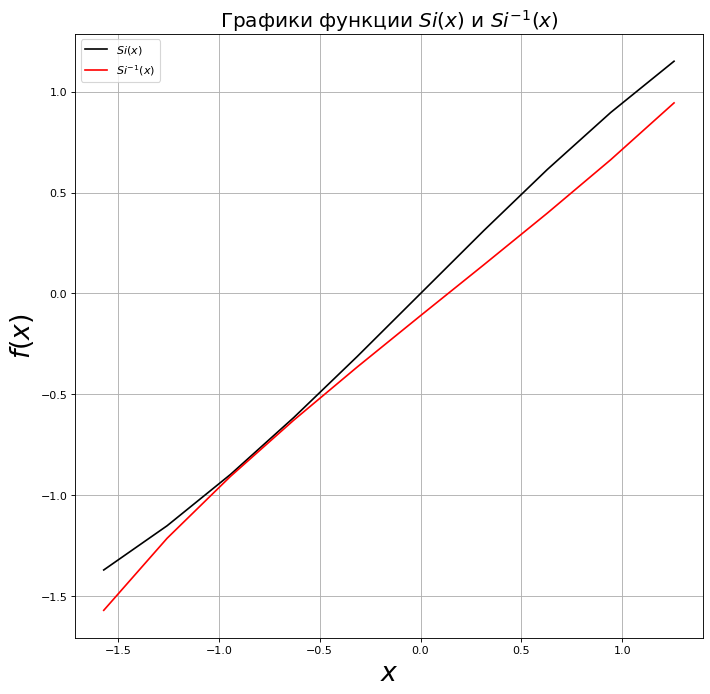

In [11]:
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x, si_vec, color='k', label=r'$Si(x)$')

plt.plot(x, res_newton_vec, color='r', label=r'$Si^{-1}(x)$')


plt.grid(True)
plt.gca().set_aspect("equal")
plt.xlabel(r'$x$', fontsize=24)
plt.ylabel(r'$f(x)$', fontsize=24)
plt.legend()
plt.title(r'Графики функции $Si(x)$ и $Si^{−1}(x)$', fontsize=18)


plt.show()

# Метод Секущих 

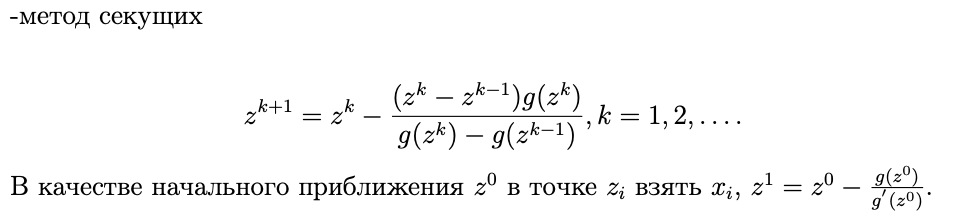

In [12]:
def secant(f: Callable[[float], float], dfdx: Callable[[float], float], x0: float, 
           F: float, eps: float=1e-10, kmax: int=1e3) -> float:
    """
    Решает f(x) = 0 методом секущей с точностью eps
    :параметр f: функция f
    :параметр dfdx: дифференциал f'
    :параметр x0: начальная точка
    :параметр: F: значения Fi
    :параметр eps: искомая точность
    :возвращает: корень из f(x) = 0 и кол-во итераций
    """
    x, xk, i = x0 - (f(x0)-F)/dfdx(x0), x0, 0
    
    while abs(x - xk) >= eps and i < kmax:
        x, xk, i = x - (f(x)-F) / (f(x) - f(xk)) * (x - xk), x, i + 1

    return np.round(x, 5), i

In [14]:
res_secant = [secant(Si, Sinc, x[i], F[i]) for i in np.arange(n)]
res_secant_vec, k_secant = zip(*res_secant)
si_vec = [Si(i) for i in x]

In [15]:
data_secant = {r'$x_i$': x,
        r'$Si(x_i)$': si_vec,
        r'$Si^{-1}(x_i)$': res_secant_vec,
        r'k итераций': k_secant}

df_secant = pd.DataFrame(data_secant)
df_secant

,$x_i$,$Si(x_i)$,$Si^{-1}(x_i)$,k итераций
0,-1.570796,-1.370762,-1.57080,0
1,-1.256637,-1.151477,-1.21355,4
2,-0.942478,-0.897189,-0.90672,3
3,-0.628319,-0.614700,-0.62767,2
4,-0.314159,-0.312442,-0.36455,3
5,0.000000,0.000000,-0.10972,3
6,0.314159,0.312442,0.14274,4
7,0.628319,0.614700,0.39830,4
8,0.942478,0.897189,0.66301,4
9,1.256637,1.151477,0.94488,5


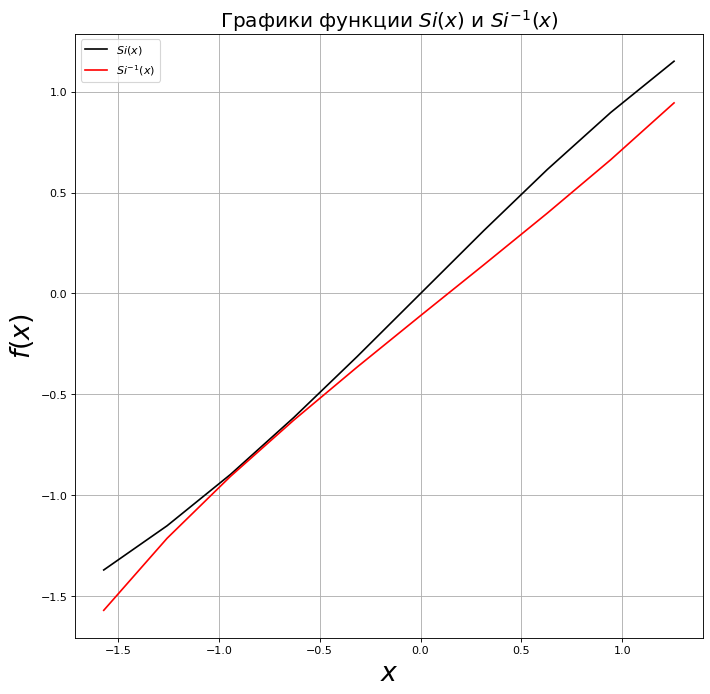

In [16]:
from pylab import figure, cm


fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x, si_vec, color='k', label=r'$Si(x)$')

plt.plot(x, res_secant_vec, color='r', label=r'$Si^{-1}(x)$')


plt.grid(True)
plt.gca().set_aspect("equal")
plt.xlabel(r'$x$', fontsize=24)
plt.ylabel(r'$f(x)$', fontsize=24)
plt.legend()
plt.title(r'Графики функции $Si(x)$ и $Si^{−1}(x)$', fontsize=18)


plt.show()

# Вывод.

Методы построения обратных Ньютона и хорд позволяют найти приближения для построения обратной функции на монотонном участке . Экспериментально доказано, что методом Ньютона вычисления происходят быстрее, чем при методе секущих.